# Image Classification

In [5]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file = 'object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'object_detection/frozen_inference_graph.pb'

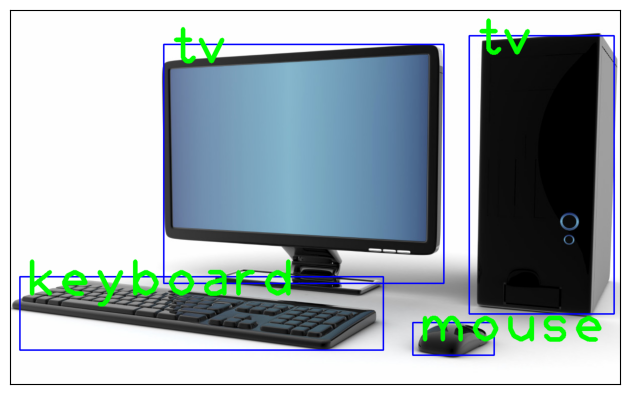

In [10]:
img = cv2.imread('/Users/gaston/Documents/repos/ImageRecognitionApp/Image-Recognition-App-Fastapi/tests/api/sample_images/computer.jpg')

model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []
file_name = 'object_detection/coco.names'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) #255/2
model.setInputMean((127.5, 127.5, 127.5)) # movilenet -> [-1,1]
model.setInputSwapRB(True)

ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

ClassIndex = ClassIndex - 1
classLabels[ClassIndex[0]], classLabels[ClassIndex[-1]]

font_scale = 7
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=7)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]); plt.yticks([]);
plt.tight_layout()
plt.show()

In [11]:
img.shape

(736, 1200, 3)

In [12]:
736*1200*3

2649600